<font color='#8800C4' size=6 align='center'><p style='text-align: center;'>**Análisis y Tratamiento de Datos en Química**\
<font color='#8800C4' size=6 align='center'><p style='text-align: center;'>**Práctica Azul de Timol**
<font color='#000000' size=4><p style='text-align: center;'>**Jet Li Vásquez Gómez - Cod. 2180876**\
<font color='#000000' size=4>         **Universidad Industrial de Santander**

In [2]:
#from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

In [3]:
df = pd.read_excel('./Datos/Datos-azul-timol.xlsx', nrows=19)
df = df.set_axis(['Muestra (1)', 'Abs (1)', 'Muestra (2)', 'Abs (2)', 'Muestra (3)', 'Abs (3)', 'Concentración [M]', 'Longitud de onda', ' Abs'], axis=1)
df = df.drop([0], axis=0)
df = df.drop(['Longitud de onda', ' Abs'], axis=1)
df

,Muestra (1),Abs (1),Muestra (2),Abs (2),Muestra (3),Abs (3),Concentración [M]
1,Blanco,0.002,Blanco,0.002,Blanco,0.002,0
2,Patrón 1,0.1,Patrón 1,0.09,Patrón 1,0.089,0.000003
3,Blanco,0,Blanco,0,Blanco,-0.001,0
4,Patrón 2,0.276,Patrón 2,0.267,Patrón 2,0.267,0.00001
5,Blanco,-0.001,Blanco,-0.001,Blanco,-0.002,0
6,Patrón 3,0.484,Patrón 3,0.482,Patrón 3,0.483,0.000017
7,Blanco,-0.001,Blanco,0.001,Blanco,0.001,0
8,Patrón 4,0.674,Patrón 4,0.66,Patrón 4,0.659,0.000024
9,Blanco,0.001,Blanco,0.001,Blanco,0,0
10,Patrón 5,0.877,Patrón 5,0.877,Patrón 5,0.877,0.000031


In [4]:
Pro = df[['Abs (1)', 'Abs (2)', 'Abs (3)']].mean(axis=1)
Pro = Pro.T
Pro = pd.DataFrame(Pro)
Pro = Pro.set_axis(['Promedio Abs'], axis=1)

N = df[['Muestra (1)']]
N

Promedios = pd.concat([N, Pro], axis=1)
Promedios

,Muestra (1),Promedio Abs
1,Blanco,0.002000
2,Patrón 1,0.093000
3,Blanco,-0.000333
4,Patrón 2,0.270000
5,Blanco,-0.001333
6,Patrón 3,0.483000
7,Blanco,0.000333
8,Patrón 4,0.664333
9,Blanco,0.000667
10,Patrón 5,0.877000


In [5]:
PBlancos = Promedios.drop([2, 4, 6, 8, 10, 12, 14, 16, 18], axis=0)
PBlancos = PBlancos[['Promedio Abs']].mean()
PBlancos

Promedio Abs    0.000778
dtype: float64

In [6]:
Patrones = Promedios.drop([3, 5, 7, 9, 11, 13, 15, 17], axis=0)
Patrones.iloc[0,1]=0.000778
Patrones

,Muestra (1),Promedio Abs
1,Blanco,0.000778
2,Patrón 1,0.093000
4,Patrón 2,0.270000
6,Patrón 3,0.483000
8,Patrón 4,0.664333
10,Patrón 5,0.877000
12,Patrón 6,1.040667
14,Patrón 7,1.266667
16,Patrón 8,1.478000
18,Patrón 9,1.657333


In [7]:
Concentraciones = df.drop([3, 5, 7, 9, 11, 13, 15, 17], axis=0)
Concentraciones = Concentraciones.drop(['Muestra (1)', 'Abs (1)', 'Muestra (2)', 'Abs (2)',  'Muestra (3)', 'Abs (3)'], axis=1)
Concentraciones             

,Concentración [M]
1,0
2,0.000003
4,0.00001
6,0.000017
8,0.000024
10,0.000031
12,0.000038
14,0.000045
16,0.000052
18,0.000059


In [8]:
RL = pd.concat([Patrones, Concentraciones], axis=1)
RL

,Muestra (1),Promedio Abs,Concentración [M]
1,Blanco,0.000778,0
2,Patrón 1,0.093000,0.000003
4,Patrón 2,0.270000,0.00001
6,Patrón 3,0.483000,0.000017
8,Patrón 4,0.664333,0.000024
10,Patrón 5,0.877000,0.000031
12,Patrón 6,1.040667,0.000038
14,Patrón 7,1.266667,0.000045
16,Patrón 8,1.478000,0.000052
18,Patrón 9,1.657333,0.000059


In [9]:
import sklearn.metrics as skm
from sklearn import linear_model
x = RL[['Concentración [M]']] 
y=RL[['Promedio Abs']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)

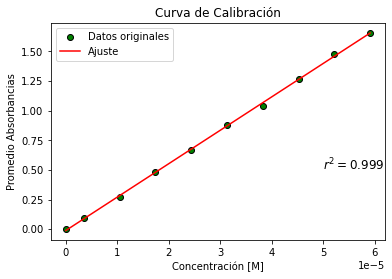

In [10]:
y1_pred = np.array(y1_pred)
x = np.array(x)
y = np.array(y)
fig, ax= plt.subplots()
ax.scatter(x, y, color='green', label='Datos originales', edgecolors='black')
ax.plot(x, y1_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración [M]")
ax.set_ylabel("Promedio Absorbancias")
ax.text(5e-5,0.50, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()
#fig.savefig("ccal1.pdf",bbox_inches='tight')

<font color='#8800C4' size=6 align='center'><p style='text-align: center;'>**PLS**

In [16]:
IR = pd.read_excel("./Datos/ASCI_IR.xlsx", header=None)
IR =  IR.T
IR

,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.040873,0.040392,0.039723,0.038974,0.038242,0.037590,0.037043,0.036593,0.036229,0.035947,...,0.000099,0.000091,0.000081,0.000070,0.000057,0.000043,0.000029,0.000017,0.000007,0.000000
77,0.012003,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,0.015255,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,0.014519,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863


In [17]:
CR = pd.read_excel('./Datos/Informacion Crudos20.xlsx', header=None)
CR.set_axis(['X', 'X', 'X', 'X', 'ASCI', 'IN(ASCI)', 'X', 'X', 'X', 'X', 'X', 'X'], axis=1, inplace=True)
CR.drop(['X'],axis=1, inplace=True)
CR.drop([0],axis=0,inplace=True)
CR = CR.reset_index(drop=True)
prop1 = CR[["ASCI"]]
prop2 = CR[["IN(ASCI)"]]
CR

,ASCI,IN(ASCI)
0,9,55
1,12,40
2,10,50
3,10,50
4,13,35
...,...,...
76,7,65
77,9,55
78,8,60
79,10,50


In [118]:
IR = np.array(IR)
prop1 = np.array(prop1)
prop2 = np.array(prop2)

In [133]:
IR.shape, prop1.shape, prop2.shape

((81, 7468), (81, 1), (81, 1))

In [132]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(IR) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(IR)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(IR, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

<font color='#8800C4' size=6>**Propiedad 1**

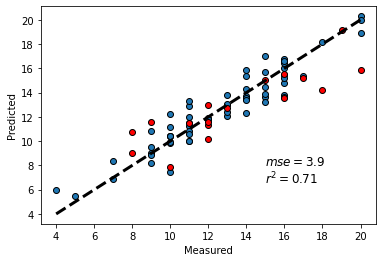

MSE = 3.9


In [197]:
#Set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop1, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,8, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [122]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [123]:
#30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

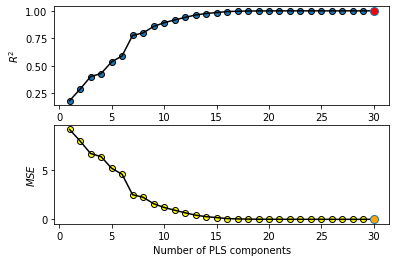

In [124]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

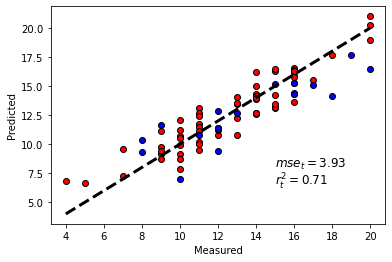

MSE = 1.59


In [198]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(15,8, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(15,6.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [126]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model=PLSRegression(n_components=10) 
x_traint = []
x_testt = [] 
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prop1[train_index]
    y_test = prop1[test_index]
    model.fit(x_train, y_train) 
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
 
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
  
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 6.307135561318973
R2. 1 on the test set: 0.5250749929074562
MSE. 2 on the test set: 13.984811642329811
R2. 2 on the test set: 0.09752664975134062
MSE. 3 on the test set: 9.154220095848634
R2. 3 on the test set: -0.18657232634797483
MSE. 4 on the test set: 4.073484239485119
R2. 4 on the test set: 0.6613147238362487
MSE. 5 on the test set: 6.937651925633426
R2. 5 on the test set: 0.13574749734201608


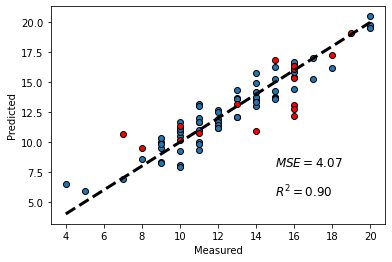

In [199]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) 
y_te=np.array(y_testt[r2s.index(max(r2s))]) 
X_tr=np.array(x_traint[r2s.index(max(r2s))]) 
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) 

Y_pred = model.predict(X_tr) 
Y_pred_test = model.predict(X_te) 

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(15,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(15,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<font color='#8800C4' size=6>**Propiedad 2**

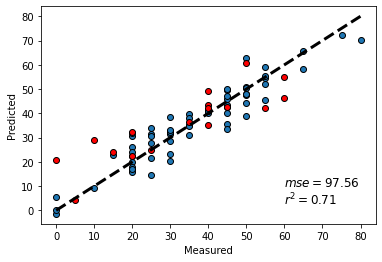

MSE = 97.56


In [230]:
#Set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop2, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [231]:
def optimise_pls(X, y, xt, n_comp):
    
 
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [232]:
#30 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 31)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

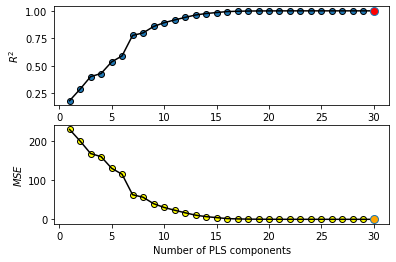

In [234]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

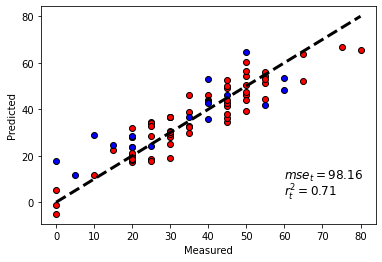

MSE = 39.82


In [237]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

In [238]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model=PLSRegression(n_components=10)
x_traint = [] 
x_testt = [] 
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prop2[train_index]
    y_test = prop2[test_index]
    model.fit(x_train, y_train) 
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    
    model.fit(x_train, y_train)
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 157.67838903297564
R2. 1 on the test set: 0.5250749929074522
MSE. 2 on the test set: 349.6202910582452
R2. 2 on the test set: 0.09752664975134084
MSE. 3 on the test set: 228.85550239621656
R2. 3 on the test set: -0.1865723263479786
MSE. 4 on the test set: 101.8371059871262
R2. 4 on the test set: 0.6613147238362546
MSE. 5 on the test set: 173.4412981408346
R2. 5 on the test set: 0.1357474973420213


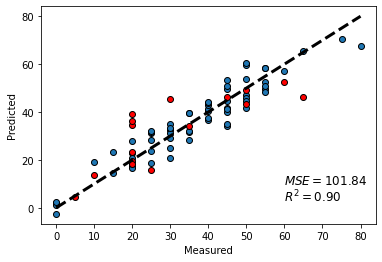

In [242]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) 
y_te=np.array(y_testt[r2s.index(max(r2s))]) 
X_tr=np.array(x_traint[r2s.index(max(r2s))]) 
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) 

Y_pred = model.predict(X_tr) 
Y_pred_test = model.predict(X_te)

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(60,10, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()